<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_04_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tutorial 4 - First Look at Data
##Dr. Daugherity, Spring 2024

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

Name | Description
-----|------------
load_boston | Load and return the boston house-prices dataset (regression).
load_iris | Load and return the iris dataset (classification).
load_diabetes | Load and return the diabetes dataset (regression).
load_digits  | Load and return the digits dataset (classification).
load_linnerud | Load and return the linnerud dataset (multivariate regression).
load_wine | Load and return the wine dataset (classification).
load_breast_cancer | Load and return the breast cancer wisconsin dataset (classification).

These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit.

**References**

*   scikit-learn User's Guide: https://scikit-learn.org/stable/datasets.html
*   Iris Data: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
*   Iris Example: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html




# The Iris Dataset


In [2]:
from sklearn import datasets

Load as a [pandas dataframe](https://pandas.pydata.org/docs/user_guide/index.html) for easy viewing
*  Each row is a sample (an iris flower)
*  The first 4 columns are **FEATURES**: data that characterize a sample
*  The last column is the **TARGET**: a number representing our classification goal, here we have 3 different species (0=setosa, 1=versicolor, 2=virginica)

Our job will be to build a **CLASSIFIER** from the training data that can examine the features to tell which target (species) an iris belongs to.

In [3]:
data = datasets.load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
data = datasets.load_iris()
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
X,y = datasets.load_iris(return_X_y=True)  # load iris data as numpy arrays

In [6]:
X.shape # my features

(150, 4)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Ploting 1D Iris Data

In [8]:
X[:,0]   # first feature, all species

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

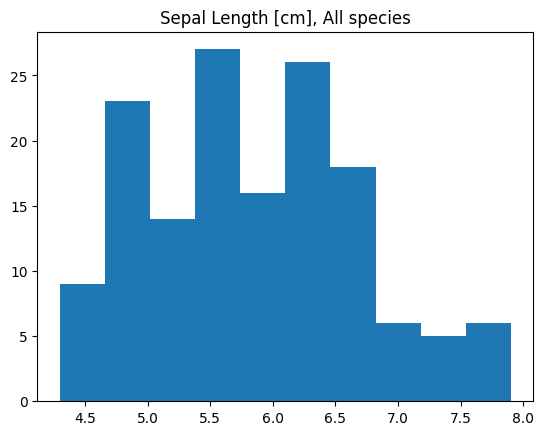

In [9]:
plt.hist( X[:,0] )
plt.title('Sepal Length [cm], All species')
plt.show()

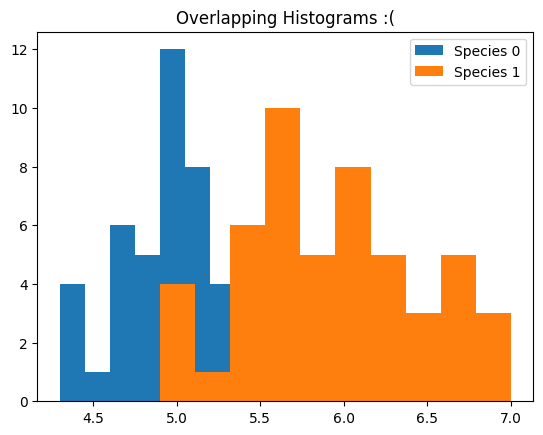

In [10]:
plt.hist( X[y==0,0], label='Species 0' )   # column 0, species 0
plt.hist( X[y==1,0], label='Species 1' )   # column 0, species 1
plt.title('Overlapping Histograms :(')
plt.legend()
plt.show()

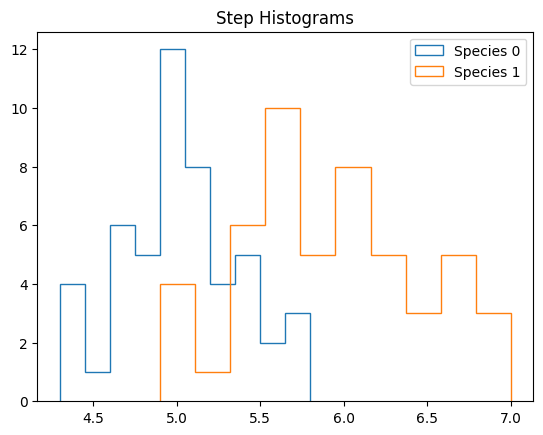

In [11]:
plt.hist( X[y==0,0],histtype='step',label='Species 0' )   # column 0, species 0
plt.hist( X[y==1,0],histtype='step', label='Species 1')   # column 0, species 1
plt.title('Step Histograms')
plt.legend()
plt.show()

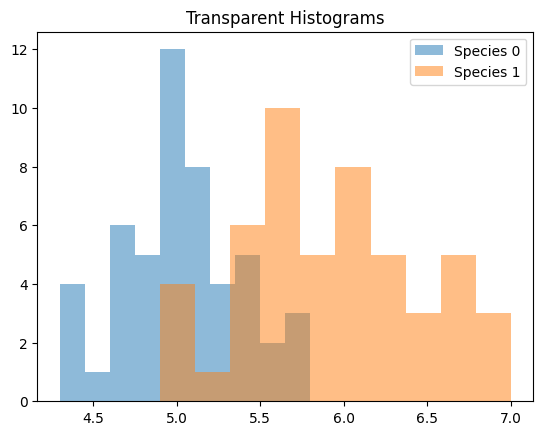

In [12]:
plt.hist( X[y==0,0],alpha=0.5,label='Species 0' )   # column 0, species 0
plt.hist( X[y==1,0],alpha=0.5,label='Species 1')   # column 0, species 0
plt.title('Transparent Histograms')
plt.legend()
plt.show()

# Violin Plots

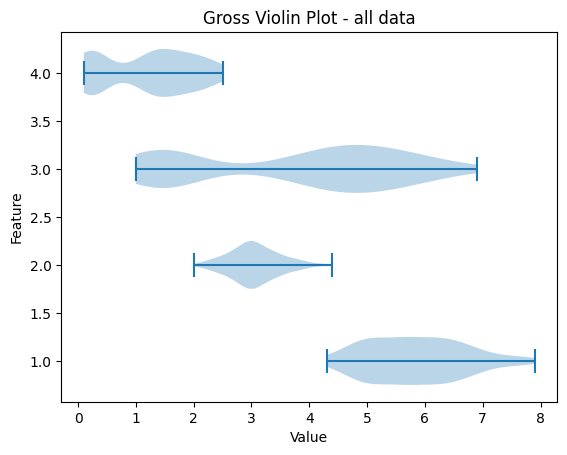

In [13]:
plt.violinplot(X, vert=0)
plt.title('Gross Violin Plot - all data')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

[Violinplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) are a great way to quickly visualize multiple datasets simultaneously.  Since X is a 2D array it draws each column separately as its own 'violin' with column 0 at x=1, column 1 at x=2, and so on.  We can fix this, but first we need to split up the species.

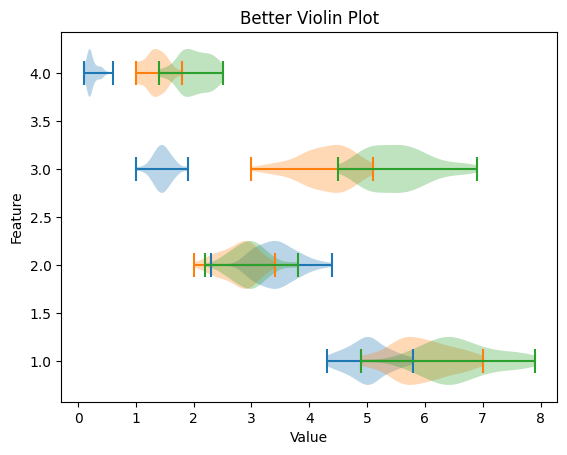

In [14]:
plt.violinplot(X[y==0,:], vert=False)
plt.violinplot(X[y==1,:], vert=False)
plt.violinplot(X[y==2,:], vert=False)
plt.title('Better Violin Plot')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

Finally, here's a fancier version

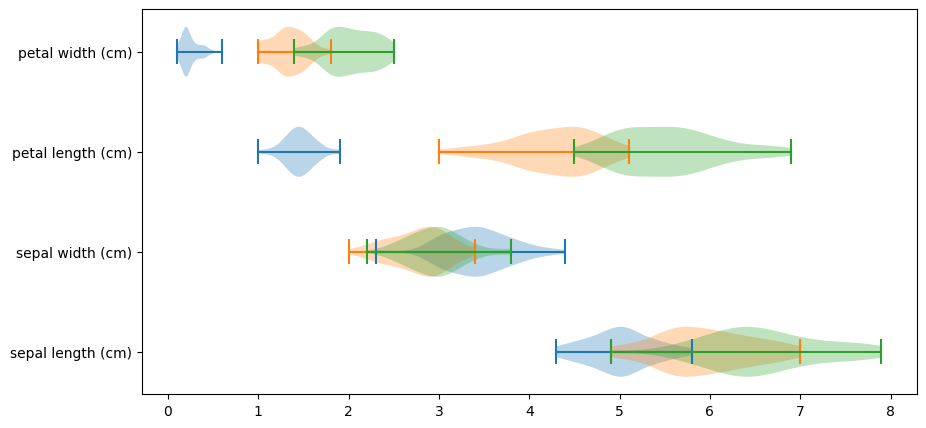

In [15]:
plt.figure(figsize=(10,5))
featnum = np.arange(4) # locations for each feature = [0,1,2,3]
for i in range(3):
  plt.violinplot(X[y==i,:], positions=featnum, vert=False)

plt.yticks(ticks = featnum, labels=data.feature_names)
plt.show()

We see right away that some features are more **informative** than others.  All species have very similar sepal widths, but the petal length varies quite a lot.

**BONUS PLOT** with legends:

Unfortunately violin plots don't support legends, but following the time-honored tradition of copying code from stack overflow here is one solution.  It is a little clunky, but it works.

https://stackoverflow.com/questions/33864578/matplotlib-making-labels-for-violin-plots


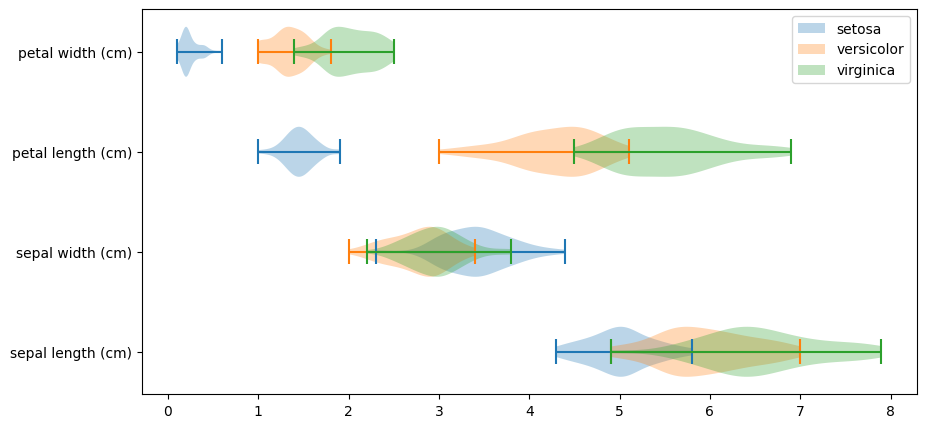

In [16]:
#https://stackoverflow.com/questions/33864578/matplotlib-making-labels-for-violin-plots
plt.figure(figsize=(10,5))
featnum = np.arange(4) # locations for each feature = [0,1,2,3]
vp = []  # a list of violin plots
for i in range(3):
  vp.append(plt.violinplot(X[y==i,:], positions=featnum, vert=False))  # add plot to the list

plt.legend([vp[0]['bodies'][0],vp[1]['bodies'][0], vp[2]['bodies'][0]], data.target_names)  # manually create legend
plt.yticks(ticks = featnum, labels=data.feature_names)
plt.show()

# Summary
We now have access to a real classification project.  Your first homework assignment is to use this data to build a very simple, but actually functional, classifier.


